In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

import os



In [3]:
df=pd.read_csv("stud.csv")

In [4]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Categories in gender column:  ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity column:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education column:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch column:  ",end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course column:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender column:   ['female' 'male']
Categories in race_ethnicity column:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column:   ['standard' 'free/reduced']
Categories in test_preparation_course column:   ['none' 'completed']


In [6]:
X=df.drop(columns=['math_score'],axis=1)

In [8]:
y=df['math_score']

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [11]:
# Create Column Transformer with 3 types of transformers

num_features=X.select_dtypes(exclude="O").columns
cat_features=X.select_dtypes(include="O").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoding",oh_transformer,cat_features),
        ("StandardScaler",numerical_transformer,num_features)
        
    ]
)


In [13]:
X=preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


(800, 19)

In [19]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)    
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (800, 19)
X_test shape:  (200, 19)
y_train shape:  (800,)
y_test shape:  (200,)


In [27]:
# Create an evaluate function to give all metrics after training the model

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_squared=r2_score(true,predicted)
    return mae,rmse,r2_squared



In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7172
- Mean Absolute Error: 4.5270
- R2 Score: 0.8550
-----------------------

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name',"R2_score"]).sort_values(by=['R2_score'],ascending=False)

,Model name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853208
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.845806
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783681
4,Decision Tree,0.719896


In [32]:
# Linear Regression
lin_model=LinearRegression()
lin_model=lin_model.fit(X_train,y_train)

y_pred=lin_model.predict(X_test)

score=r2_score(y_test,y_pred)*100

print("Accuracy of the model is %.2f"%score)



Accuracy of the model is 88.04


Text(0, 0.5, 'Actual values')

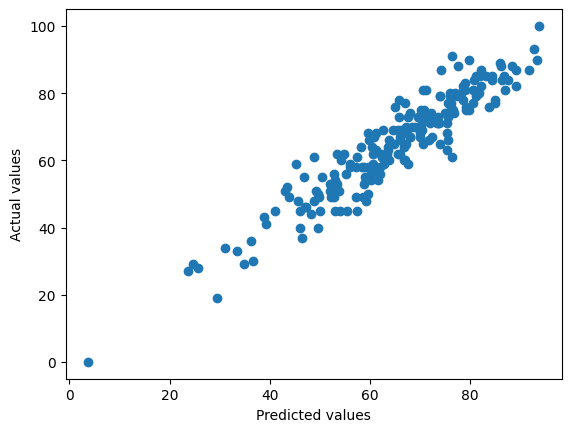

In [33]:
# plot y_pred y_test

plt.scatter(y_pred,y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")


In [36]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred}).sort_values(by=["Difference"],ascending=False)
                                                                                        
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
265,59,45.188276,13.811724
859,87,74.184710,12.815290
199,78,65.700592,12.299408
867,61,48.914440,12.085560
...,...,...,...
816,45,55.441118,-10.441118
589,48,59.290795,-11.290795
318,63,75.318335,-12.318335
371,45,57.380744,-12.380744
